In [9]:
import torch
from torchvision import datasets
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import numpy as np
import gzip

d2l.use_svg_display()

In [ ]:
# 读取数据集， 完了，似乎又没法下载数据集
trans = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
mnist_test = datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
print(len(mnist_train, mnist_test))

In [10]:
# 那只能自己写一个导入的数据集
class FashionMnistDataset(data.Dataset):
    """读取数据、初始化数据"""

    def __init__(self, folder, data_name, label_name, transform=None):
        (train_set, train_labels) = load_data(folder, data_name, label_name)
        self.train_set = train_set
        self.train_labels = train_labels
        self.transform = transform

    def __getitem__(self, index):
        img, target = self.train_set[index], int(self.train_labels[index])
        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.train_set)


def load_data(data_folder, data_name, label_name):
    with gzip.open(os.path.join(data_folder, label_name), 'rb') as labpath:
        y_train = np.frombuffer(labpath.read(), np.uint8, offset=8)

    with gzip.open(os.path.join(data_folder, data_name), 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8,
                                offset=16).reshape(len(y_train), 28, 28)

    return (x_train, y_train)

In [13]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
mnist_train = FashionMnistDataset("../data/FashionMNIST", "train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", transform=transforms.ToTensor())
mnist_test = FashionMnistDataset("../data/FashionMNIST", "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz", transform=transforms.ToTensor())
print(len(mnist_train), len(mnist_test))

60000 10000


In [17]:
print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


In [18]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels =['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]    # 标签是浮点型的

In [23]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()   # 将axes由n*m的Axes组展平成1*nm的Axes组
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):    # 图片张量
            ax.imshow(img.numpy())
        else:    # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)  # 不需要坐标轴
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

torch.Size([20, 1, 28, 28])


array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'coat'}>], dtype=object)

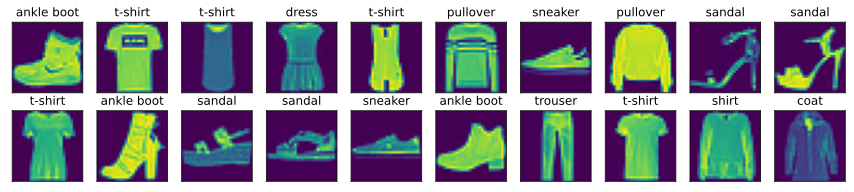

In [25]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=20)))
show_images(X.reshape(20, 28, 28), 2, 10, titles=get_fashion_mnist_labels(y))   # 由[20, 1, 28, 28]转换为[20, 28, 28]

In [26]:
train_loader = data.DataLoader(mnist_train, batch_size=256, shuffle=True, num_workers=4)

In [27]:
timer = d2l.Timer()
for X, y in train_loader:
    continue
print(f'{timer.stop():.2f} sec')